# Visualization

As the return value of a sliced dataset is a `xarray.DataArray` instead of a `numpy.ndarray` plotting features of `xarray` is used. For more information about `xarray` see https://docs.xarray.dev/en/stable/

A a more experimental level, some HDF5 datasets or multiple HDF5 datasets as a tuple can be nicely 3D-rendered by the `ipyvolume` package, see last section

In [1]:
import h5rdmtoolbox as h5tbx

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with h5tbx.File() as h5:
    dsx = h5.create_dataset('x', data=np.linspace(0, 10, 20), attrs=dict(units='mm', long_name='x'), make_scale=True)
    dsy = h5.create_dataset('y', data=np.linspace(0, 5, 10), attrs=dict(units='mm', long_name='y'), make_scale=True)
    dsz = h5.create_dataset('z', data=np.linspace(0, 3, 4), attrs=dict(units='mm', long_name='z'), make_scale=True)
    h5.create_dataset('data', data=np.random.random((10, 20)), attrs=dict(units='m/s', long_name='velocity'), attach_scales=(dsy, dsx))
    
    xx, yy, zz = np.meshgrid(dsy.values[:], dsz.values[:], dsx.values[:])
    
    h5.create_dataset('u', data=np.sin(xx), attrs=dict(units='m/s', long_name='x_velocity'), attach_scales=(dsz, dsy, dsx))
    h5.create_dataset('v', data=yy, attrs=dict(units='m/s', long_name='y_velocity'), attach_scales=(dsz, dsy, dsx))
    h5.create_dataset('w', data=np.ones((4, 10, 20)), attrs=dict(units='m/s', long_name='z_velocity'), attach_scales=(dsz, dsy, dsx))
    h5.dump()    

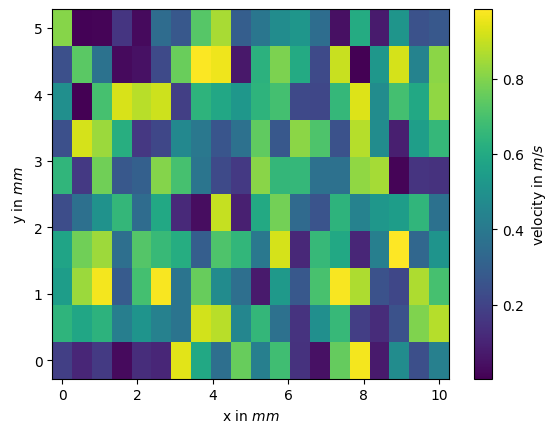

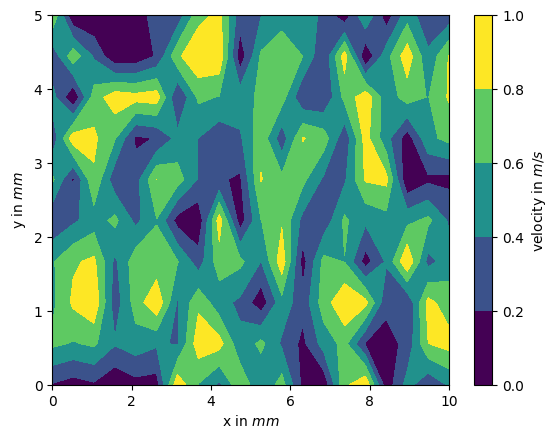

<Figure size 640x480 with 0 Axes>

In [3]:
with h5tbx.File(h5.hdf_filename) as h5:
    # some plotting
    plt.figure()
    h5['data'][:].plot()
    plt.show()
    
    plt.figure()
    h5['data'][:].plot.contourf()
    plt.figure()
    plt.show()

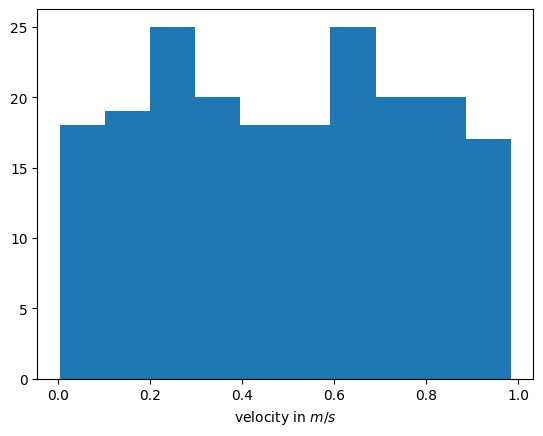

In [4]:
with h5tbx.File(h5.hdf_filename) as h5:
    h5['data'][:].plot.hist()
    plt.show()

In [5]:
with h5tbx.File(h5.hdf_filename) as h5:
    h5.dump()
    d = h5['data'][:, 0]
    # d.plot.line(marker='o')

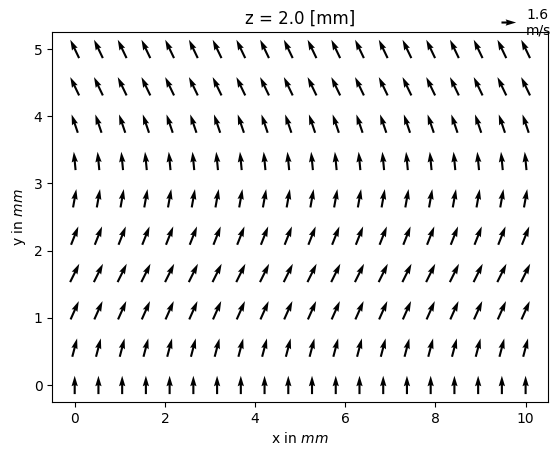

In [6]:
from h5rdmtoolbox.extensions import vector
with h5tbx.File(h5.hdf_filename) as h5:
    ds = h5.Vector(u=h5.u, v=h5.v)
    ds[2, :, :].plot.quiver(x='x', y='y', u='u', v='v')

## Using ipyvolume

In [7]:
#from h5rdmtoolbox.extensions import ipyvolume

In [8]:
# with h5tbx.File(h5.hdf_filename) as h5:
#     vec =  h5.Vector(u=h5.u, v=h5.v, w=h5.w)
#     ipv_quiver = vec[:, :, :].ipyvolume.quiver(x='x',y='y',z='z',
#                                               u='u',v='u',w='u')
#     ipv_quiver.view(-10, -40, 2.5)
#     ipv_quiver.show()

In [9]:
# with h5tbx.File(h5.hdf_filename) as h5:
#     ipv_surf = h5.data[:].ipyvolume.plot()
#     ipv_surf.view(-10, -40, 2.5)
#     ipv_surf.show()